<a href="https://colab.research.google.com/github/KCollins/along-path/blob/main/Second_pulse_correlate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Started 25 September 2022, DK

Second-tick correlation example: Localize one sinusoidal pulse in time.
This is meant to mimic receiving and localizing a WWV or WWVH second pulse.

The second ticks differ between the two transmitting stations:
WWV: Five cycles exactly of 1000 Hz.

WWVH:Six  cycles exactly of 1200 Hz.


Plan:

Make a signal vector of 20 milliseconds, initialize to zero.

Create a second-tick signal at some arbitrary place in the vector.

Make a template vector for the correlation.

Run the correlation with usual looping construct (create correlation vector, take the progressing inner products)

Graph the resulting correlation.

Add noise to the signal with the pulse, try again to locate the pulse using correlation.

Try using numpy library correlation function (which likely uses transforms), make sure it does the same thing as the nested loops written for the demonstration.

Import needed libraries, set up some constants

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
sample_rate = 10000 # samples per second
T=1/sample_rate   # sample period
freqWWV  =1000. # Hz
freqWWVH =1200. # Hz
epoch = 0.020     # seconds for the sampling

tick_duration = 0.005 # seconds, fixed by WWV
itick_samples = int(tick_duration*sample_rate)  # number of samples in one 5 ms tick
tick_delay = 0.005    # seconds, "propagation" delay
itick_delay = int(tick_delay*sample_rate) # number of samples for the delay


Create a signal vector of zeros to represent a 20 millisecond epoch.

Place a 50 element pulse somewhere, say, samples 50-99.

Note that this signal has no additive noise.

In [ ]:

signal=np.zeros(int(epoch*sample_rate))
#print(np.sin(2*np.pi*freqWWV*T))
for i in range (itick_delay, itick_delay+itick_samples):
  signal[i]=np.sin(2*np.pi*freqWWV*(i-50)*T)

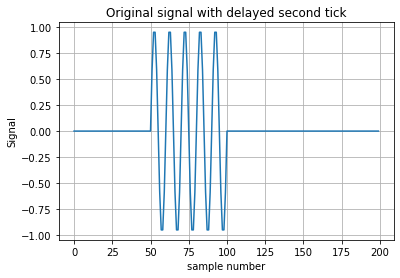

In [ ]:
# show the pulse in the signal vector:
fig, ax = plt.subplots()
ax.plot(signal)

ax.set(xlabel='sample number', ylabel='Signal',
       title='Original signal with delayed second tick')
ax.grid()
plt.show()

Create a template vector to match the pulse

(Code for preparing the template is similar to code making the delayed second tick, but without a delay term).

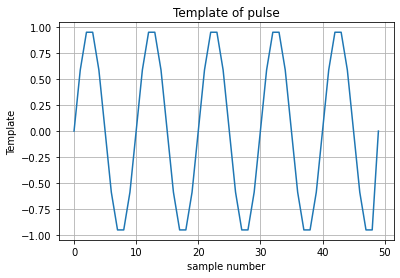

In [ ]:
template=np.zeros(itick_samples)
for i in range (0,template.size-1):
  template[i]=np.sin(2*np.pi*freqWWV*(i)*T)
# show the template
fig, ax = plt.subplots()
ax.plot(template)

ax.set(xlabel='sample number', ylabel='Template',
       title='Template of pulse')
ax.grid()
plt.show()

Create a correlation vector, initialize to zero

In [ ]:
correlation=np.zeros(signal.size)

Run the correlation

In [ ]:
for i in range(0, np.size(signal)-np.size(template)-1):
    for j in range (0, np.size(template-1)):
        correlation[i]=correlation[i]+signal[i+j]*template[j]

Plot resulting correlation vector.  Note peak correlation at beginning of pulse in signal vector.

The resulting signal localization is perfect:  The correlation peak is at sample 50, the same as the signal's delay.

Note that correlation is not normalized--the correlation size scales with the size of the correlation vector.
This could be corrected.  It should peak at 1 for full correlation.

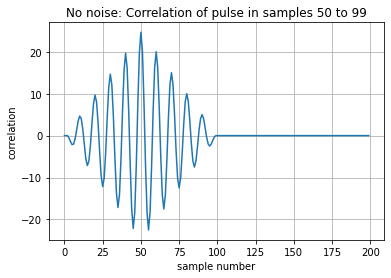

In [ ]:
index = np.arange(0, np.size(correlation))
fig, ax = plt.subplots()
ax.plot(index, correlation)

ax.set(xlabel='sample number', ylabel='correlation',
       title='No noise: Correlation of pulse in samples 50 to 99')
ax.grid()
plt.show()

Add Gaussian noise to each sample:

(try setting the standard deviation to various values.  2 seems to be about the limit for reliable detection of the 1 "volt" signal)

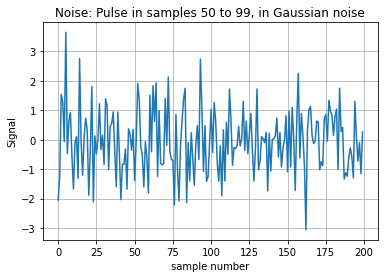

In [ ]:
noise = np.random.normal(0, 1., signal.size) # (mean, standard deviation, shape)
noisy_signal=signal+noise
# Plot the noisy signal
index = np.arange(0, np.size(correlation))
fig, ax = plt.subplots()
ax.plot(index, noisy_signal)
ax.set(xlabel='sample number', ylabel='Signal',
       title='Noise: Pulse in samples 50 to 99, in Gaussian noise')
ax.grid()
plt.show()

and replot the correlation.
The signal localization is again very good.


In [ ]:
noise_correlation=np.zeros(noisy_signal.size)
for i in range(0, np.size(noisy_signal)-np.size(template)-1):
    for j in range (0, np.size(template-1)):
        noise_correlation[i]=noise_correlation[i]+noisy_signal[i+j]*template[j]

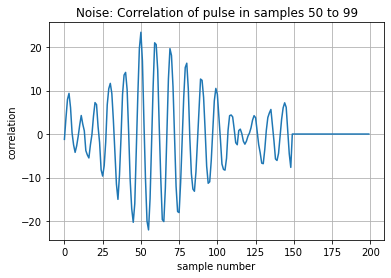

In [ ]:
# Plot the new correlation
index = np.arange(0, np.size(noise_correlation))
fig, ax = plt.subplots()
ax.plot(index, noise_correlation)

ax.set(xlabel='sample number', ylabel='correlation',
       title='Noise: Correlation of pulse in samples 50 to 99')
ax.grid()
plt.show()

Now try using the numpy.correlate function.

Looks like it does the same thing as the nested loop function and is probably faster for being pre-compiled.

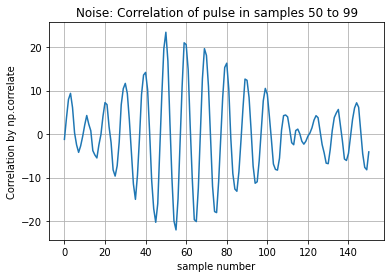

Max correlation value:  23.3824816251225 (nominal 50)
Index of maximum corr:  50 (nominal 50)


In [ ]:
np_corr = np.correlate(noisy_signal, template, mode='valid') # modes valid, same, full.  Valid matches the loops

index = np.arange(0, np.size(np_corr))
fig, ax = plt.subplots()
ax.plot(index, np_corr)

ax.set(xlabel='sample number', ylabel='Correlation by np.correlate',
       title='Noise: Correlation of pulse in samples 50 to 99')
ax.grid()
plt.show()
print('Max correlation value: ', np.amax(np_corr), '(nominal 50)')
# np.argmax returns the index of the array's maximum value
print('Index of maximum corr: ', np.argmax(np_corr), '(nominal 50)')